STAT 453: Deep Learning (Spring 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2021/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss21

---

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p torch

Author: Sebastian Raschka

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.20.0

torch: 1.9.0a0+d819a21



# MLP with Custom Data Loader

## Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders

## Settings and Dataset

In [4]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 1
BATCH_SIZE = 64
NUM_EPOCHS = 100
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [6]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders(batch_size=BATCH_SIZE)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([64, 1, 28, 28])
Image label dimensions: torch.Size([64])
Class labels of 10 examples: tensor([5, 6, 7, 1, 7, 1, 8, 4, 7, 0])


## Model

In [7]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        self.model = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(num_hidden, num_classes))

    def forward(self, x):
        return self.model(x)

    
#################################
### Model Initialization
#################################
    
torch.manual_seed(RANDOM_SEED)
model = MLP(num_features=28*28,
            num_hidden=100,
            num_classes=10)

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## Training

In [8]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

Epoch: 001/100 | Batch 0000/0004 | Loss: 2.3657
Epoch: 001/100 | Train: 13.67% | Validation: 7.81%
Time elapsed: 0.00 min
Epoch: 002/100 | Batch 0000/0004 | Loss: 2.2586
Epoch: 002/100 | Train: 13.67% | Validation: 7.81%
Time elapsed: 0.00 min
Epoch: 003/100 | Batch 0000/0004 | Loss: 2.2720
Epoch: 003/100 | Train: 23.44% | Validation: 14.84%
Time elapsed: 0.00 min
Epoch: 004/100 | Batch 0000/0004 | Loss: 2.2514
Epoch: 004/100 | Train: 24.61% | Validation: 14.84%
Time elapsed: 0.00 min
Epoch: 005/100 | Batch 0000/0004 | Loss: 2.2410
Epoch: 005/100 | Train: 26.95% | Validation: 15.23%
Time elapsed: 0.00 min
Epoch: 006/100 | Batch 0000/0004 | Loss: 2.2548
Epoch: 006/100 | Train: 14.06% | Validation: 10.16%
Time elapsed: 0.00 min
Epoch: 007/100 | Batch 0000/0004 | Loss: 2.1952
Epoch: 007/100 | Train: 14.84% | Validation: 8.59%
Time elapsed: 0.01 min
Epoch: 008/100 | Batch 0000/0004 | Loss: 2.2205
Epoch: 008/100 | Train: 37.50% | Validation: 28.52%
Time elapsed: 0.01 min
Epoch: 009/100 | Ba

## Evaluate

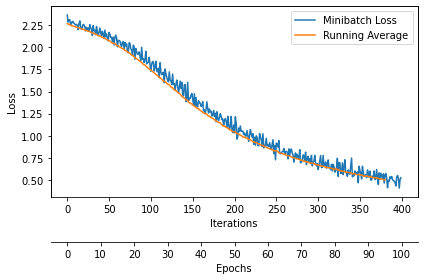

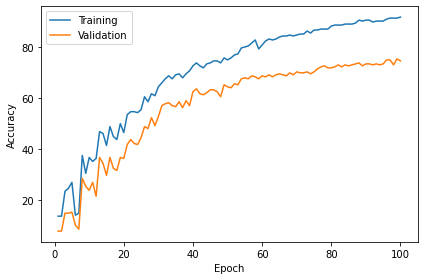

In [9]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.show()

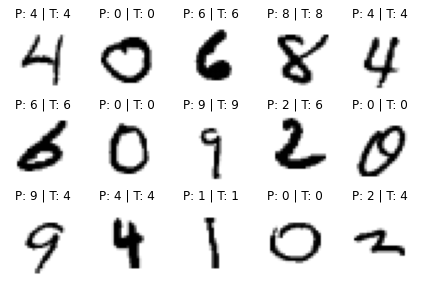

In [10]:
show_examples(model=model, data_loader=test_loader)